<font size=7>Introduction to Perceptron

The perceptron is a machine learning algorithm that is used to make classifications between two different binary outcomes, $\{-1,1\}$. It has a rich history in neuroscience and AI, and is founded on the concept of the McCulloch-Pitts Neuron we disscussed in class. Here's a [video clip](https://www.youtube.com/watch?v=cNxadbrN_aI) of it from the 1950's! Here we provide an introduction to the perceptron algorithm. Later will be adapt the perceptron so that it more closely resembles neurons in the brain.

<font color="red"><b>Note:</b> This homework will be due April 11th at 11:59pm PT.  Make sure to complete the exercises at the bottom of this notebook.

If you are working locally you may need to make sure you have the required packages. To install these run the following code block. Note that you do not need to do this if you are working in codespaces. If you get an error bellow, change the `!pip3` to just `!pip`.

In [ ]:
!python3 -m ensurepip --upgrade

Looking in links: c:\Users\dylan\AppData\Local\Temp\tmpfgfpmesj
Processing c:\users\dylan\appdata\local\temp\tmpfgfpmesj\setuptools-65.5.0-py3-none-any.whl


In [1]:
!pip3 install sklearn
!pip3 install matplotlib
!pip3 install numpy
!pip3 install ipympl
!pip3 install ipywidgets
!pip3 install ipywidgets==7.7.1
!pip3 install nbformat

!jupyter nbextension enable --py widgetsnbextension
!jupyter nbextension install --py widgetsnbextension

  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'


  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
      
      More information is available at
      https://github.com/scikit-learn/sklearn-pypi-packag

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: ok
Installing C:\Users\dylan\anaconda3\lib\site-packages\widgetsnbextension\static -> jupyter-js-widgets
Up to date: C:\ProgramData\jupyter\nbextensions\jupyter-js-widgets\extension.js
Up to date: C:\ProgramData\jupyter\nbextensions\jupyter-js-widgets\extension.js.map
- Validating: ok

    To initialize this nbextension in the browser every time the notebook (or other app) loads:
    
          jupyter nbextension enable widgetsnbextension --py
    


You only need to run these cells once so comment them out once you have run them and then restart the kernel to make sure the changes have been implemented.

Run the following cell to load all the necessary functions for the homework, you can find the code for these in `perceptron_source_code.ipynb` and we suggest you take a look there and try to understand the functions being called. Unlike the cells above, you will need to run this cell every time you restart your workspace. 

In [2]:
%run "perceptron_source_code.ipynb"

# <font color="gray">Learn from Reading Material <small>(Optional)

Though we describe the perceptron algorithm here, you should teach it to yourself using the following reading material on perceptrons, linear algebra, and quantum notation. For each topic choose the reading material the works best for you!


Read the [wiki article](https://en.wikipedia.org/wiki/Perceptron) and chapter 5 of [Hertz's book](reading_materials/Hertz_Book_Chapter_5.pdf) on the perceptron. Here is [a review](reading_materials/Linear_Algebra_Review.pdf) of topics in linear algebra. This longer [linear algebra reference (Jordan)](reading_materials/Jordan_Linear_Algebra_Summary.pdf) from the classic book, "Parallel Distributed Computing" is particularly focused on the topics we'll be covering. Optionally, if you want to prepare for a generalization of these ideas to quantum mechanics, read the "mathematical interlude: vector spaces" in the Chapter 1, section 1.9 of [Susskind's book](reading_materials/Quantum_Chapter_1.pdf). This is another [simple resource](https://towardsdatascience.com/a-casual-guide-to-dirac-notation-17961670ae7a) that introduces quantum notation. The additional material below  provides a more in depth walkthrough of the perceptron algorithm.

**Reading Material**
1. Basic Perceptrons Introduction
    * [Preceptron Wikipedia](https://en.wikipedia.org/wiki/Perceptron) - A good introduction
    * [This video](https://www.youtube.com/watch?v=NogzKXE74AA) is a nice perceptorn overview. [This video](https://www.youtube.com/watch?v=4Gac5I64LM4) does basic perceptron examples. Feel free to suggest other videos!
2. Perceptrons Textbooks
     * [Pattern Recognition and Machine Learning, Chapter 3 (Bishop)](reading_materials/Bishop_Book_Chapter_3.pdf) - The perceptron is deeply described here. There's also a more general description of binary learning.
     * [Theory of Neural Computation, Chapter 5 (Hertz)](reading_materials/Hertz_Book_Chapter_5.pdf) - Deep dive into perceptron. Also describes perceptron confidence threshold.
2. <font color="red">Important: Linear Algebra Review </font>
    * [Parallel Distributed Computing, Chapter 9](reading_materials/Jordan_Linear_Algebra_Summary.pdf) A classic! Describes linear algebra within the context we'll be using it.
    * [General review of topics](reading_materials/Linear_Algebra_Review.pdf) in Linear Algebra
2. Quantum Notation
    * [Simple introduction](https://towardsdatascience.com/a-casual-guide-to-dirac-notation-17961670ae7a) to Dirac notation
    * [Quantum Mechanics, Chapter 1 (Susskind)](reading_materials/Quantum_Chapter_1.pdf) - Optionally, read the "mathematical interlude" section to learn about bra-ket notation.

**Advanced Papers**
1. [Fundamentals of Artificial Neural Networks (Hassoun)](https://neuron.eng.wayne.edu/tarek/MITbook/t_contents.html)- Chapter 1 covers learning capacity. Chapter 3 gives proof of convergence theorem. 
1. [Perceptron Learning with Sign-Constrained Weights (Amit)](reading_materials/BioPhysical_Perceptron_Paper.pdf)- Introduces framework for biorealistic perceptrons
2. [Space of Interactions in Neural Network Models (Gardener)](reading_materials/Perceptron_Storage_Capacity.pdf)- Discusses the information storage capacity of perceptrons
3. [Information Capacity of Perceptron vs Purkinje Cell (Brunel)](reading_materials/Perceptron_vs_Purkinje.pdf)- Compares properties of Perceptrons to the Purkinje Cells from which they were derived

# What is the Perceptron?

## Linear Classifiers

Suppose you are given a a bucket of tulips and roses and are told to build a learning algorithm to distinguish tulips from roses based on their petals. For each flower you pluck a petal and measure it's width and length. You then plot the results. Run the code below to see the plot. What rule would you use to classify the flowers? An intuitive way to solve this problem is to draw a line on the plot that seperates tulips from roses. This is called a linear classifier. Use the interactive widgets below to fit a linear classifier to the data.

In [3]:
%matplotlib inline
guiLinearClassifier()

interactive(children=(FloatSlider(value=0.0, description='slope', max=2.0, min=-2.0, step=0.5), FloatSlider(va…

Let's formalize what we've just done. For $n$ samples, define the
petal measurements you took to be the $n$ input vectors $\mathbf{x}_{1},\mathbf{x}_{2},...,\mathbf{x}_{n}$
and the flower species to be the target output $y_{1},y_{2},...,y_{n}$, with $y_{i} = +1$ if the measurement vector $\mathbf{x}_{i}$ comes from a tulip and $y_{i} = -1$ otherwise. In this example, there's two measurements so each vector $\mathbf{x}_{i}\in\mathbb{R}^{2}$
. For binary classifiers we'll always have $y_{i}\in\{-1,1\}$. We
can define a linear classifier as the function

$$
f(\mathbf{w},\mathbf{x})=\begin{cases}
+1 & \text{if }\mathbf{w}\cdot\mathbf{x}+b>0\\
-1 & \text{otherwise}
\end{cases}
$$


Here ${\mathbf{w}}\in\mathbf{\mathbb{R}}^{2}$ is called the weight vector and
$b\in\mathbb{R}$ is called the bias. $-b$ is called the threshold. This is because $\mathbf{w}\cdot\mathbf{x}+b>0$ is the same as $\mathbf{w}\cdot\mathbf{x}>-b$, making $-b$ the cuttoff between $\pm1$. To make $f(\mathbf{w},\mathbf{x})$
look simpler, we can "hide the bias" in $\mathbf{w}$ . Currently
we have $\mathbf{x}_{i}=[\text{width},\text{length}]$ , but instead
let's write $\tilde{\mathbf{x}_{i}}=[\text{width},\text{length},1]$
. For $\tilde{\mathbf{w}}\cdot\tilde{\mathbf{x}}$ to still work we must then
add an additional parameter to $\tilde{\mathbf{w}}$, so $\tilde{\mathbf{w}}=[w_{1},w_{2},w_{b}]\in\mathbf{\mathbb{R}}^{3}$.
If we set $w_{b}=b$ we have $\tilde{\mathbf{w}}\cdot\tilde{\mathbf{x}}=\mathbf{w}\cdot\mathbf{x}+b$
. 


Note that the above tulips and roses data set and its linear threshold function would now be plotted in 3 dimensions instead of 2, one dimension for each of the three components of the input vectors. This is explained in detail in the section below. Basically, since the third component is always 1, the plane containing all of the input examples illustrated in the 2-dimensional interactive widget above would actually lie one unit below the plane seen in that 2-dimensional widget.  The line that separates the roses from the tulips becomes a tilted plane through the origin that creates the separating line as it passes through the plane containing the examples. 
 From now on we will always assume the threshold is written into $\mathbf{w},\mathbf{x}$
and disregard the notation $\tilde{\mathbf{w}},\tilde{\mathbf{x}}$. Thus
we have

$$
f(\mathbf{w},\mathbf{x})=\begin{cases}
+1 & \text{if }\mathbf{w}\cdot\mathbf{x}>0\\
-1 & \text{otherwise}
\end{cases}
$$

## Visualizing Weights and Threshold

So how do the weights $\mathbf{w}$ relate to the linear classifier line that we draw? Let's go back to 2 dimensions. In the graph below, we see that $\mathbf{w}$ defines a linear classifier through the origin that is perpendicular to it. We can see why by looking at $f(\mathbf{w},\mathbf{x})$ . Notice that the boundary between $\pm1$ occures at $\mathbf{w}\cdot\mathbf{x}=0$. According to the rules for [dot products](https://en.wikipedia.org/wiki/Dot_product) this means that $\mathbf{w}$ and $\mathbf{x}$ are perpendicular.

To give a concrete example, in the graph below we have $\mathbf{w}=[1,-2]$ . When we consider the equation in $f(\mathbf{w},\mathbf{x})$, we see that it produces the linear classifier boundary shown below.

$$0=\mathbf{w}\cdot\mathbf{x}=-x_{1}+2x_{2} \iff x_{2}=\frac{1}{2}x_{1}$$


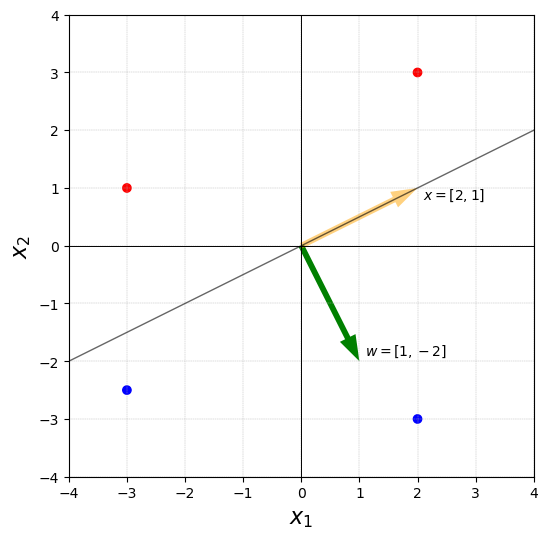

In [4]:
%matplotlib inline
guiWeights2D()

In the previous example we excluded the bias to make visualization easier to understand. How can we visualize the bias in a linear classifier? Below is an example of a dataset that is not linearly separable unless we include the bias. Notice that the line $x_2=1$ seperates the data. Looking again at the graph above, we see that the linear classifier goes through the origin. This is always true, because it's perpendicular to $\mathbf{w}$ which always start at the origin. So then how in the world is it possible to draw a linear classifier that seperates the data below?

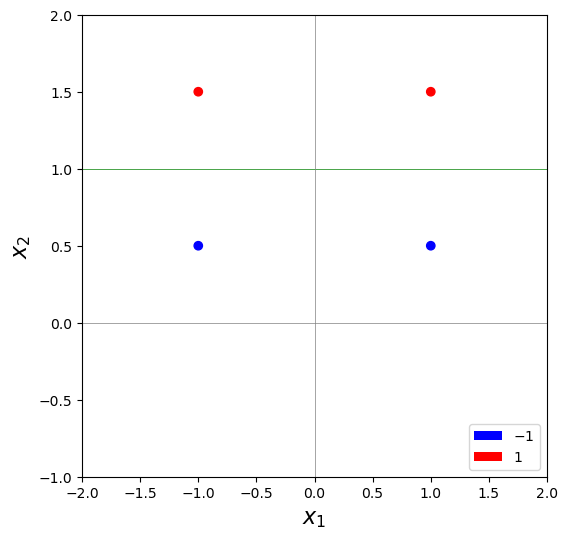

In [5]:
%matplotlib inline
guiBias2D()

Remember that when we include the bias into the weights, $\mathbf{x}$
gains an additional parameter $x_{3}$ . Thus we must now consider
a 3D graph, which is shown below. You can move the graph around using
your mouse. $x_{3}$ is set to the same value for all inputs. Let's
say it's always $x_{3}=1$ . This means that the points are now all
raised up to $1$ on the $x_{3}\text{-Axis}$ (Please verify with
3D graph). So comparing the 3D graph to the 2D one above, the 2D graph
is created by taking a cross section of the 3D graph at $x_{3}=1$
. By raising all of the inputs up off of the $x_{1},x_{2}-\text{Axis}$
we give ourselves a little bit space that we can use to insert a linear
classifier that goes through the origin. In this case, we have $\mathbf{w}=[0,-1,1]$
. Notice that if we use the equation for the classifier boundary,
the threshold occures at $x_{2}=1$ , as seen in the 2D graph.

$$
0=\mathbf{w}\cdot\mathbf{x}=\begin{bmatrix}0 & -1 & 1\end{bmatrix}\begin{bmatrix}x_{1}\\
x_{2}\\
1
\end{bmatrix}=-x_{2}+1\iff x_{2}=1
$$

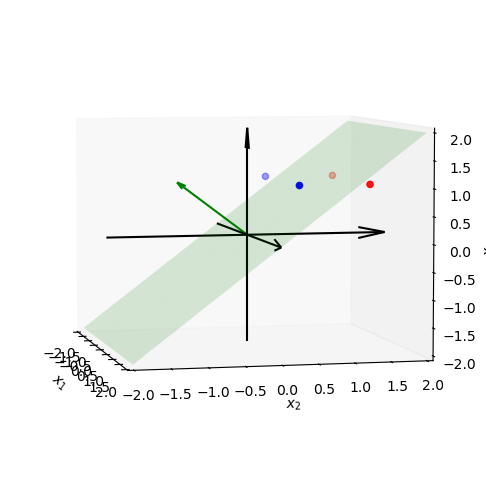

In [6]:
%matplotlib inline   
# %matplotlib notebook  This command used to create an interactive graph, now causes errors
guiBias3D()

## The Perceptron

How do we determine the values of $\mathbf{w}$ that correctly classify
the data? We use the perceptron algorithm! The perceptron algorithm
works like this: Randomly select some initial weights, $\mathbf{w}_{0}$
. Often we simply set $\mathbf{w}_{0} = {\bf 0}$, the all 0 vector. One by one, cycle through each
of the input/output pairs $\mathbf{x}_{i},y_{i}$ . If the perceptron
correctly classifies $y_{i}$ , which means $f(\mathbf{w},\mathbf{x}_{i})=y_{i}$
, then do nothing. If it misclassifies $y_{i}$ , then update the
weights according to the rule $\mathbf{w}_{t+1}=\mathbf{w}_{t}+y_{i}\mathbf{x}_{i}$
. Notice that after $\mathbf{w}$ changes, the value of $f(\mathbf{w},\mathbf{x}_{i})$
may also change. The algorithm keeps cycling through data until everything
is classified correctly. Because it's important, let's state the perceptorn
update rule again

$$
\mathbf{w}_{t+1}=\begin{cases}
\mathbf{w}_{t}+y\mathbf{x} & \text{if }f(\mathbf{w},\mathbf{x})\neq y\\
\mathbf{w}_{t} & \text{otherwise}
\end{cases}
$$

Let's restate the entire algorithm again using pseudocode. Let's call
our data, $\mathscr{D}=\begin{bmatrix}(\mathbf{x}_{1},y_{1}),(\mathbf{x}_{2},y_{2}),...,(\mathbf{x}_{n},y_{n})\end{bmatrix}$

**<font size=4> Perceptron** $(\mathscr{D})$

$\mathbf{w}= {\bf 0}$ 

**WHILE:** $\exists\:f(\mathbf{w},\mathbf{x}_{i})\neq y_{i}$ in $\mathscr{D}$

$\quad$**FOR:** each $(\mathbf{x}_{i},y_{i})\in\mathscr{D}$

$\quad$ $\quad$**IF:** $f(\mathbf{w},\mathbf{x}_{i})\neq y_{i}$

$\quad$ $\quad$ $\quad$ $\mathbf{w}:=\mathbf{w}+y\mathbf{x}$

**RETURN:** $\mathbf{w}$

# Perceptron Example

## Visualization 

Let's see the perceptron in action! The interactive graph steps through every datapoint using the perceptron algorithm. Notice that by the end, the algorithm is able to correctly classify every point.


<font color="gray">Note: To make this easy to visualize, we removed the threshold.

In [7]:
%matplotlib inline
guiPerceptron()

interactive(children=(IntSlider(value=5, description='step', max=10), Output()), _dom_classes=('widget-interac…

## Perceptron Code 

Below is a class `Perceptron` that implements the update rule for the perceptron algorithm. This code could be the starting point for a larger Perceptron class.

In [8]:
import numpy as np
class Perceptron:
    
    def __init__(self, w ):
        self.w = w                                               # Set initial weights when creating object

    def update( self, x, y):                   
        y_pred = -1. if np.dot(self.w, x)<0 else 1.              # Get models prediction for y        
        self.w = self.w + (y!=y_pred) * float(y)*np.array(x)     # Update weights based on x,y,y_pred

Here is the data we used in the above example

In [9]:
x=np.array([ [3.5,1.5], [-1.5,-2], [4,-1], [0,3.5], [-3.5,1], [-1.5,3], [2.5,2.5], [0.5,-4], [-3.5,-1.5], [-2.5,-2.5] ])
y=np.array([-1,1,1,-1,-1,-1,-1,1,1,1])

Notice that as we step through the data, we get the exact same weights as shown in the visualization

In [10]:
learner = Perceptron([-1,-1])                  # Initial weights are w=[-1,-1]
for i in range(len(y)):                        # Cycle through each datapoint
    learner.update( x[i], y[i])                # Update the perceptron using x and y
    print(f"Step {i+1}\tw={learner.w}")     # Print w for each update

Step 1	w=[-1. -1.]
Step 2	w=[-1. -1.]
Step 3	w=[ 3. -2.]
Step 4	w=[ 3. -2.]
Step 5	w=[ 3. -2.]
Step 6	w=[ 3. -2.]
Step 7	w=[ 0.5 -4.5]
Step 8	w=[ 0.5 -4.5]
Step 9	w=[ 0.5 -4.5]
Step 10	w=[ 0.5 -4.5]


# What is Dirac Notation?

$\quad$ In this course, as an extension of the simple classical mathematics notion for vectors and dot products used above, we will use [Dirac notation](https://en.wikipedia.org/wiki/Bra\%E2\%80\%93ket\_notation)
(or Bra-Ket notation) created by the great physicist, Paul Dirac,
to denote and operate on vectors. In so doing, we will also expand our treatment to include not just real numbers but also complex numbers, with a real part and an imaginary part, which is a multiple of the imaginary number $i = \sqrt{-1}$. Complex numbers have many applications in linear algebra, not just in quantum mechanics! They are essential for understanding the central concept of eigenvalues, which we return to later.  Here we give a brief description of Bra-Ket notation. Read the
"mathematical interlude" in chapter 1 of [Quantum Mechanics:
The Theoretical Minimum](./reading_materials/Quantum\_Chapter\_1.pdf)
to review the necessary background material. In Bra-Ket notation, complex vectors are written in a funny
looking way that comes in handy when you get deeper into linear algebra $|\mathbf{a}\rangle,|\mathbf{b}\rangle\in\mathbb{C}^{2}$

$$
\begin{array}{ccc}
|\mathbf{a}\rangle=\begin{bmatrix}1\\
i
\end{bmatrix} &  & |\mathbf{b}\rangle=\begin{bmatrix}-1\\
1+i
\end{bmatrix}\end{array}
$$

In Bra-Ket notation these vectors are called Ket vectors. The Ket
vectors have corresponding Bra vectors, $\langle\mathbf{a}|=\begin{bmatrix}1,-i\end{bmatrix}$
and $\langle\mathbf{b}|=\begin{bmatrix}-1,1-i\end{bmatrix}$ . In
general, a Bra is the complex conjugate transpose of some Ket

$$
\langle\mathbf{a}|=|\mathbf{a}\rangle^{\dagger}=\overline{|\mathbf{a}\rangle}^{T}
$$

We call the conjugate transpose the "dagger" and symbolize it using
$\dagger$ . For any two vectors of complex numbers $|\mathbf{a}\rangle$ , $|\mathbf{b}\rangle$, we define their dot product (aka "inner product") as 

$$
\langle\mathbf{a}|\mathbf{b}\rangle:=\langle\mathbf{a}||\mathbf{b}\rangle=|\mathbf{a}\rangle^{\dagger}|\mathbf{b}\rangle
\\
$$

From now on, we'll say the word "inner product" instead of "dot product". If all the components of the vectors happen to be real numbers, then the complex conjugate doesn't change anything, and we see that

$$
\langle\mathbf{a}|\mathbf{b}\rangle = \mathbf{a}{}^{T}\mathbf{b}=\mathbf{a}\cdot\mathbf{b}\quad\text{if components of }\mathbf{a},\mathbf{b}\in\mathbb{R}
$$

This relates Bra-Ket notation to traditional dot product notation.
A matrix $M$ can be squeezed in between a Bra and a Ket: $\langle\mathbf{a}|\mathbf{M}|\mathbf{b}\rangle\equiv\mathbf{a}^{\dagger}\mathbf{M}\mathbf{b}$
. If $I$ is the identity matrix and $c$ is a complex number, then we see that $\langle\mathbf{a}|c\mathbf{I}|\mathbf{b}\rangle=\mathbf{a}^{\dagger}{c}\mathbf{b}$, so you can also squeeze a complex number in between the Bra and the Ket. 
We will define,  $\langle\mathbf{a}|\mathbf{a}\rangle:=||\mathbf{a}||^{2}$
. We call $\langle\mathbf{a}|\mathbf{a}\rangle$ the squared norm or squared length
of the vector $\mathbf{a}$. The double vertical bars are used to denote a quantity called the norm in linear algebra, and norm of a vector measures its length. (the Norm is a more general concept than length, and can apply to things other than vectors, e.g. to matrices as well). Note that the sign + or - does not matter when evaluating the squared norm, it is a "pure magnitude". To give a Bra-Ket example with the Perceptron,
we can rewrite the the linear classifier $f(\mathbf{w},\mathbf{x})$
as

$$
f(\mathbf{w},\mathbf{x})=\begin{cases}
+1 & \text{if }\langle\mathbf{w}|\mathbf{x}\rangle>0\\
-1 & \text{otherwise}
\end{cases}
$$

# Perceptron Convergence Theorem 

Any time a linear classifier can correclty classify all the data,
we can show that the perceptron algorithm will find such a solution.
Let's prove it! This proof works by considering how $\mathbf{w}$
changes as the number of updates to the algorithm $\tau$ increases.
For data that is solvable, let $\hat{\mathbf{w}}$ be any weight vector of length 1 that classifies the data correctly. We will put upper and lower bounds on $\langle\mathbf{w}|\mathbf{w}\rangle$
and $\langle\hat{\mathbf{w}}|\mathbf{w}\rangle$ in terms of $\tau$.
We rely on the fact that the perceptron only stops when everything
has been classified and then use the [Cauchy-Schwarz Inequality](https://en.wikipedia.org/wiki/Cauchy%E2%80%93Schwarz_inequality)
has to stop at some point. This proof can be read without Bra-Ket notation in Bishop's book (chapter 3), Hertz's book (Chapter 5), and Hassoun's book (Chapter 3).

## Bound on $\langle\hat{\mathbf{w}}|\mathbf{w}\rangle$

Let start by finding a lower bound for $\langle\hat{\mathbf{w}}|\mathbf{w}\rangle$.
For a linear classifier to correctly classify all data, there must
exist some weights $\hat{\mathbf{w}}$ for which $y_{i}=f(\hat{\mathbf{w}},\mathbf{x}_{i})\:\forall i$
. We start the perceptron algorithm with all zero weights $\mathbf{w}_{0}$
. At each step of the
algorithm, we change $\mathbf{w}$ using the update rule 

$$
|\mathbf{w}_{t+1}\rangle=|\mathbf{w}_{t}\rangle+y_{i}|\mathbf{x}_{i}\rangle\quad(1)
$$

 where $|\mathbf{x}_{i}\rangle$ is a vector that is misclassified.
After running the algorithm for a while, suppose that the number of
times that each vector $|\mathbf{x}_{i}\rangle$ has been misclassified
and updated is $\tau_{i}\in\mathbb{N}$. Then the weights at this
point are given by


\begin{array}{ccc}
|\mathbf{w}\rangle=\mathbf{w}_{0}+\sum_{n}\tau_{i}y_{i}|\mathbf{x}_{i}\rangle= & \sum_{n}\tau_{i}y_{i}|\mathbf{x}_{i}\rangle\end{array}

We now take the inner product of the above equation with $\hat{\mathbf{w}}$ to find our first bound

$$
\begin{array}{cl}
\langle\hat{\mathbf{w}}|\mathbf{w}\rangle & =\sum_{n}\langle\hat{\mathbf{w}}|\tau_{i}y_{i}|\mathbf{x}_{i}\rangle\\
 & =\sum_{n}\tau_{i}y_{i}\langle\hat{\mathbf{w}}|\mathbf{x}_{i}\rangle\\
 & \geq\tau\min_{n}y_{i}\langle\hat{\mathbf{w}}|\mathbf{x}_{i}\rangle
\end{array}
$$

Where $\tau=\sum_{n}\tau_{i}$ is the total number of weight updates
and the inequality results from replacing each update vector by the
smallest possible update. We see that $\langle\hat{\mathbf{w}}|\mathbf{w}\rangle$
is bounded below by a function of $\tau$ .

## Bound on $\langle\mathbf{w}|\mathbf{w}\rangle$

Lets now find an upper bound for $\langle\mathbf{w}|\mathbf{w}\rangle$.
If we take the inner product of the update rule $(1)$ we have

$$
\begin{array}{clc}
\langle\mathbf{w}_{t+1}|\mathbf{w}_{t+1}\rangle & =\langle\mathbf{w}_{t}|\mathbf{w}_{t}\rangle+\langle\mathbf{x}_{i}|y_{i}^{2}|\mathbf{x}_{i}\rangle+2y_{i}\langle\mathbf{w}_{t}|\mathbf{x}_{i}\rangle\\
 & \leq\langle\mathbf{w}_{t}|\mathbf{w}_{t}\rangle+\langle\mathbf{x}_{i}|y_{i}^{2}|\mathbf{x}_{i}\rangle\\
 & =\langle\mathbf{w}_{t}|\mathbf{w}_{t}\rangle+\langle\mathbf{x}_{i}|\mathbf{x}_{i}\rangle & \leftarrow\text{since }y_{i}^{2}=1\\
 & \leq\langle\mathbf{w}_{t}|\mathbf{w}_{t}\rangle+\langle\mathbf{x}|\mathbf{x}\rangle_{\max}
\end{array}
$$

where the first inequality follows from the fact that $|\mathbf{x}_{i}\rangle$
was missclassified, look inside the equation $f(\hat{\mathbf{w}},\mathbf{x})$
to notice that this means $y_{i}\langle\mathbf{w}_{t}|\mathbf{x}_{i}\rangle<0$
. We also define $\langle\mathbf{x}|\mathbf{x}\rangle_{\max}$ as
the inner product of the largest input so that $\langle\mathbf{x}_{i}|\mathbf{x}_{i}\rangle\leq\langle\mathbf{x}|\mathbf{x}\rangle_{\max}$
. If we now consider the change $\Delta$ in the value of $\langle\mathbf{w}|\mathbf{w}\rangle$
we have

$$
\Delta\langle\mathbf{w}|\mathbf{w}\rangle\equiv\langle\mathbf{w}_{t+1}|\mathbf{w}_{t+1}\rangle-\langle\mathbf{w}_{t}|\mathbf{w}_{t}\rangle\leq\langle\mathbf{x}|\mathbf{x}\rangle_{\max}
$$

and so after $\tau$ updates we have the following upper bound on
$\langle\mathbf{w}|\mathbf{w}\rangle$

$$
\langle\mathbf{w}|\mathbf{w}\rangle\leq\tau\langle\mathbf{x}|\mathbf{x}\rangle_{\max}
$$

## Cauchy-Schwarz Inequality

The [Cauchy-Schwarz inequality](https://en.wikipedia.org/wiki/Cauchy%E2%80%93Schwarz_inequality) is one of the most important inequalities in math. It states that

$$
\dfrac{|\langle\hat{\mathbf{w}}|\mathbf{w}\rangle|^{2}}{\langle\mathbf{w}|\mathbf{w}\rangle\langle\hat{\mathbf{w}}|\hat{\mathbf{w}}\rangle}\leq1
$$

We now show that this inequality puts an upper limit on the number
of updates $\tau$. We just saw that $\langle\hat{\mathbf{w}}|\mathbf{w}\rangle$
and $\langle\mathbf{w}|\mathbf{w}\rangle$ have bounds that grow in
terms $\tau$. By plugging in the smallest posssible value of $\langle\hat{\mathbf{w}}|\mathbf{w}\rangle$
into the numerator and the largest possible value of $\langle\mathbf{w}|\mathbf{w}\rangle$
into the denominator of the left side of the equation, we maximize
the number of possible updates that can occur.

$$
\begin{array}{cl}
 & \dfrac{\begin{pmatrix}\tau\min_{n}y_{i}\langle\hat{\mathbf{w}}|\mathbf{x}_{i}\rangle\end{pmatrix}^{2}}{\tau\langle\mathbf{x}|\mathbf{x}\rangle_{\max}\langle\hat{\mathbf{w}}|\hat{\mathbf{w}}\rangle}=\dfrac{\tau^{2}\begin{pmatrix}\min_{n}y_{i}\langle\hat{\mathbf{w}}|\mathbf{x}_{i}\rangle\end{pmatrix}^{2}}{\tau\langle\mathbf{x}|\mathbf{x}\rangle_{\max}\langle\hat{\mathbf{w}}|\hat{\mathbf{w}}\rangle}=\tau\dfrac{\begin{pmatrix}\min_{n}y_{i}\langle\hat{\mathbf{w}}|\mathbf{x}_{i}\rangle\end{pmatrix}^{2}}{\langle\mathbf{x}|\mathbf{x}\rangle_{\max}\langle\hat{\mathbf{w}}|\hat{\mathbf{w}}\rangle}\leq1\\
\\
\iff & \tau\leq\dfrac{\langle\mathbf{x}|\mathbf{x}\rangle_{\max}\langle\hat{\mathbf{w}}|\hat{\mathbf{w}}\rangle}{\begin{pmatrix}\min_{n}y_{i}\langle\hat{\mathbf{w}}|\mathbf{x}_{i}\rangle\end{pmatrix}^{2}}
\end{array}
$$

The very last inqueality shows that $\tau$ must be less than or equal
to the equation on the right. If there were any more updates
than that we'd break the Cauchy-Schwartz Inequality. Notice that this right
hand equation is written purely in terms of $\hat{\mathbf{w}},\mathbf{x}_{i},y_{i}\:\forall i$
, which are values that were given to us at the very beginning of
the proof, before the perceptron algorithm was started. Thus
we could calculate the maximum possible number of perceptron updates
before we ever run the algorithm. We have proven the perceptron convergence
theorem.

## Understanding Max Updates 

Previously we showed that the maximum number of possible updates $\tau$
for the perceptron algorithm is bounded above by

$$
\tau\leq\dfrac{\langle\mathbf{x}|\mathbf{x}\rangle_{\max}\langle\hat{\mathbf{w}}|\hat{\mathbf{w}}\rangle}{\begin{pmatrix}\min_{n}y_{i}\langle\hat{\mathbf{w}}|\mathbf{x}_{i}\rangle\end{pmatrix}^{2}}
$$

The right hand equation looks messy, but with a little thinking
we can actually make sense of it. For starters, we are going to simplify
the problem by normalizing $\hat{\mathbf{w}},\mathbf{x}_{i}\,\forall i$
. This means that we're now choosing an "all correct" weights
vector $\hat{\mathbf{w}}$ such that $\langle\hat{\mathbf{w}}|\hat{\mathbf{w}}\rangle=1$
, and we are rescaling every input $\mathbf{x}_{i}$ so that $\langle\mathbf{x}_{i}|\mathbf{x}_{i}\rangle=1$
. Are we allowed to do this? Yes. Remember that our goal is to find
a line (linear classifier) that correctly splits the data in two.
Notice in the graph below, that the correctness of this linear
classifier only depends on the angle of the data points and the weights vector,
not on their magnitudes.

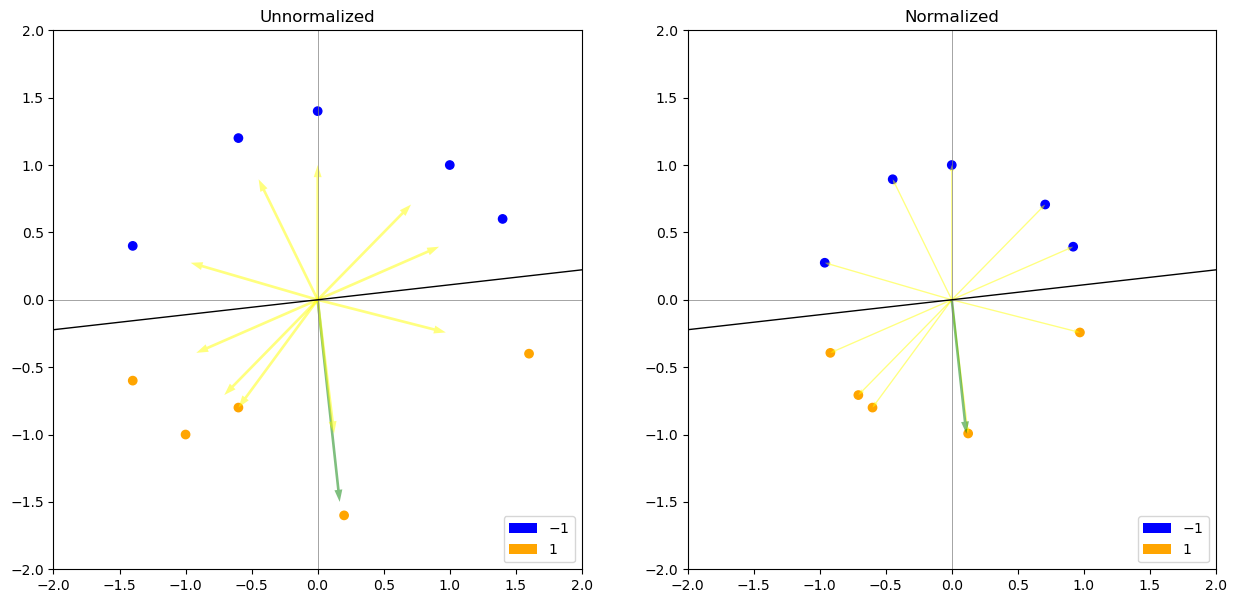

In [11]:
%matplotlib inline
guiNormalize()

With our normalized data and weights, the right hand equation becomes

$$
\dfrac{\langle\mathbf{x}|\mathbf{x}\rangle_{\max}\langle\hat{\mathbf{w}}|\hat{\mathbf{w}}\rangle}{\begin{pmatrix}\min_{i}y_{i}\langle\hat{\mathbf{w}}|\mathbf{x}_{i}\rangle\end{pmatrix}^{2}}=\dfrac{(1)(1)}{\begin{pmatrix}\min_{i}y_{i}\langle\hat{\mathbf{w}}|\mathbf{x}_{i}\rangle\end{pmatrix}^{2}}=\dfrac{1}{\begin{pmatrix}\min_{i}|\langle\hat{\mathbf{w}}|\mathbf{x}_{i}\rangle|\end{pmatrix}^{2}}\:\leftarrow y_{i}\langle\hat{\mathbf{w}}|\mathbf{x}_{i}\rangle>0\text{ and }y_{i}=\pm1
$$

Remember that the dot product tells us that the angle between two vectors is

$$
\cos\theta=\frac{\langle\hat{\mathbf{w}}|\mathbf{x}_{i}\rangle}{||\mathbf{x}_{i}||\:||\hat{\mathbf{w}}||}=\langle\hat{\mathbf{w}}|\mathbf{x}_{i}\rangle\:\leftarrow||\mathbf{x}_{i}||=||\hat{\mathbf{w}}||=1
$$

Plugging the angles for our input data into the equation for $\tau$ yields

$$
\tau\leq\dfrac{1}{\min_{i}|\langle\hat{\mathbf{w}}|\mathbf{x}_{i}\rangle|^{2}}=\dfrac{1}{\min_{i}|\cos\theta_{i}|^{2}}=\max_{i}|\cos\theta_{i}|^{-2}
$$

Review the [unit circle](https://en.wikipedia.org/wiki/Unit_circle) for cosine. Notice that the angle
$\theta_{i}$ between $\mathbf{x}_{i}$ and $\mathbf{\hat{w}}$
maximizes $|\cos\theta_{i}|^{-2}=\infty$ when they are perpendicular $(\theta=\pm\pi)$.
The angle $\theta_{i}$ minimizes $|\cos\theta_{i}|^{-2}=1$ when
they are parallel $(\theta=0)$. Remember that the linear classifier boundary is
 always perpendicular to $\hat{\mathbf{w}}$ , which is also the same place where $|\cos\theta_{i}|^{-2}$ is maximized. What this means
is that the maximum number of updates is determined by the "hardest
to classify" data point that lies closest to the decision boundary.
The closer this data point is to the boundary the longer the perceptron algorthim
may take to run. Intuitively this makes a lot of sense.

# <font color="green">Exercises (27 Points Total)

In this lecture we considered how one might go about building an algorithm that is able to correctly distinguish between two items based on data about them. For example, how to classify tulips from roses, when give measurments from the flowers. We showed that a linear classifier can be used to "draw a line" between the datapoints in order to classify them into one of two categories. We then introduced the perceptron algorithm as a method for finding an appropriate linear classifier given some data. Below are exercises to further familiarize yourself with this material.

## <font color="green"> Dirac Notation (12 Points Total)

### Simple Calculations <font color="green"> (7 Points)

Consider the following Matrices, Vectors and Scalar:

$$
|\mathbf{a}\rangle=\begin{bmatrix}\begin{array}{c}
2\\
-i\\
3+i
\end{array}\end{bmatrix}\qquad|\mathbf{b}\rangle=\begin{bmatrix}\begin{array}{c}
\pi\\
53\\
2-i
\end{array}\end{bmatrix}
$$

$$
\mathbf{M}=\begin{bmatrix}\begin{array}{ccc}
4 & 2 & 1\\
5 & 5 & 2\\
1 & 1 & 3
\end{array}\end{bmatrix}\qquad c=4
$$

Calculate the following: 

<b><font color="green">Answer

$\langle \mathbf{a} |$ =

$\langle \mathbf{b} |$ =

$\langle\mathbf{a}|\mathbf{b}\rangle$ =

$\langle\mathbf{a}|\mathbf{M}|\mathbf{b}\rangle$ =

$|\mathbf{a}\rangle\langle\mathbf{b}|$ =

$c\mathbf{M}\begin{pmatrix}|\mathbf{a}\rangle+|\mathbf{b}\rangle\end{pmatrix}$ = 

$c\mathbf{M}|\mathbf{a}\rangle+c\mathbf{M}|\mathbf{b}\rangle$ =

### Dirac to Dot Product <font color="green"> (5 Points)

Rewrite the following equations from dirac notation to dot products, include the dagger notation for any complex conjugates (latex: ^{\dagger}, $\dagger$)

For the exercise, assume the arbitrary vectors: $|\mathbf{x}\rangle$, $|\mathbf{y}\rangle$, $|\mathbf{z}\rangle$

And the arbitrary matrix: $\mathbf{A}$

<b><font color="green"> Answer

$\langle\mathbf{x}|\mathbf{y}\rangle \rightarrow$

$\langle\mathbf{x}|\mathbf{A} \rightarrow$

$|\mathbf{x}\rangle\langle\mathbf{y}|\mathbf{z}\rangle \rightarrow$

$|\mathbf{x}\rangle+|\mathbf{y}\rangle\langle\mathbf{z}| \rightarrow$

$\langle\mathbf{x}|\mathbf{A}|\mathbf{z}\rangle+\langle\mathbf{y}|\mathbf{A}|\mathbf{z}\rangle\rightarrow$

## <font color="green"> Linear Separability (7 Points Total)

Below are some exercises to familiarize yourself with the perceptron algorithm. Before you start the exercises, please first read over the source code that was used to make the graphics in this notebook. The following exercises are considerably easier if you copy/paste the source code and the edit it. For the following exercises, consider the dataset below:

In [12]:
x = np.array([[-.7,.2],[.5,.5],[.7,.3],[-.3,.6],[0,.7],[-.5,-.5],[.8,-.2],[.1,-.8],[-.7,-.3],[-.3,-.4]])  
y = np.array([-1,-1,-1,-1,-1,1,1,1,1,-1]) 

### Graph New Dataset <font color="green"> (1 Point)

Graph this dataset. The simplest way to do this is to change one of the functions from the source code. Choose whichever code block works best for you. Don't edit the code directly in the source code file, instead, copy it below and then make changes.

<b><font color="green">Answer

###  Describe Data <font color="green"> (2 Points)

How does this dataset compare to the example we used earlier? Is it linearly separable? Explain. 

<b><font color="green">Answer

### Predict Outcome <font color="green"> (2 Points)

What do you think will happen if you run the perceptron algorithm on thise dataset? Will it converge?

<b><font color="green">Answer

### Run Perceptron <font color="green"> (1 Point)

Copy the code from `guiPerceptron` to below. Edit it so that it uses the new dataset and so that you see the first 1000 steps of the perceptron algorithm. **Hint:** To complete this exercise, you only need to add 3 additional characters to the code. Plot the results from theses changes below.

<b><font color="green">Answer

### Analyze Outcome <font color="green"> (1 Point)

Look what happens as you cycle through the algorithm at different points of the 1000 steps. Does the algorithm converge according to the **Perceptron Convergence Theorem**? Briefly explain the reasoning for your answer.

<b><font color="green">Answer

## <font color="green"> Small Margin (8 Points Total)
    

Consider the two datasets below. The weight vector $\hat{\mathbf{w}}=[0,1]$ produces the optimal linear classifier for both datasets.  

Dataset 1

In [13]:
x= np.array([[ 0.93969262,0.34202014],[0.76604444,  0.64278761],[0.5,0.8660254 ],[0.17364818,0.98480775],[-0.17364818,  0.98480775],[-0.5,  0.8660254 ],[-0.76604444,  0.64278761],[-0.93969262,  0.34202014],[-0.93969262, -0.34202014],[-0.76604444, -0.64278761],[-0.5, -0.8660254 ],[-0.17364818, -0.98480775],[ 0.17364818, -0.98480775],[ 0.5, -0.8660254 ],[ 0.76604444, -0.64278761],[ 0.93969262, -0.34202014]])
y= np.array([-1, -1, -1, -1, -1, -1, -1, -1, 1, 1, 1, 1, 1, 1, 1, 1])


Dataset 2

In [14]:
x=np.array( [[0.76604444, 0.64278761],[ 0.5,0.8660254],[0.17364818,0.98480775],[-0.17364818, 0.98480775],[-0.5, 0.8660254],[-0.76604444, 0.64278761],[-0.76604444, -0.64278761],[-0.5, -0.8660254 ],[-0.17364818, -0.98480775],[ 0.17364818, -0.98480775],[0.5,-0.8660254],[0.76604444,-0.64278761]] )
y = np.array([-1, -1, -1, -1, -1, -1, 1, 1, 1, 1, 1, 1])


### Plots <font color="green"> (4 Points)

Make a plot of both datasets. In each plot include the datapoints, the weight vector, and the decision boudnary. 

<b><font color="green">Answer

**Dataset 1**

**Dataset 2**

### Predict Outcome <font color="green"> (2 Points)

If the perceptron algorithm were to be run on both datasets, which dataset would it converge on first? Why?

<b><font color="green">Answer

### Theoretical upper bound <font color="green"> (2 Points)

For both datasets, calculate the maximum possible number of updates using the equation from the Perceptron Convergence Theorem

<font color="orange"><b>Hint:</b> Notice that the datasets and weight vector have already been normalized

<b><font color="green">Answer

## <font color="green"> Extra: Three Dimensional Perceptron

The Perceptron doesn't just work in 2 dimensions! By increasing the dimemsion of the weight vector, the perceptron can separate any linearly seperable n-dimensional data! To allow our perceptron to classify in 3 dimensions, we need to modify the class a little.

In [15]:
class Perceptron:
    
    def __init__(self, w):
        self.w = w                                               # Set initial weights when creating object

    def update( self, x, y):                   
        y_pred = -1. if np.dot(self.w, x)<0 else 1.              # Get models prediction for y        
        self.w = self.w + (y!=y_pred) * float(y)*np.array(x)     # Update weights based on x,y,y_pred

    def pred(self, x):                                           # Added this, Predict y for a given x
        y_pred = -1 if np.dot(self.w, x) < 0 else 1
        return y_pred

Now we generate some data for our perception to operate on, try different random seeds which determine the starting weight vector to see how the perceptron updates over time based on the data!

In [16]:
random.seed(42)

Create and draw the datapoints:

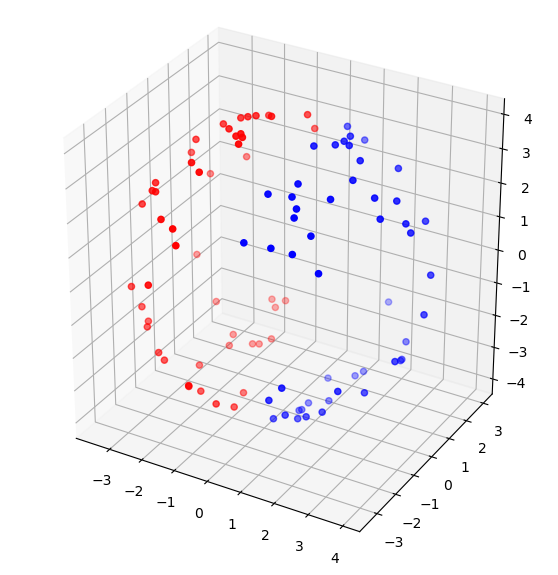

In [17]:
%matplotlib inline

class_zero, class_one, data, labels = Get_3d_Data()

x_coords_0, y_coords_0, z_coords_0 = class_zero
x_coords_1, y_coords_1, z_coords_1 = class_one

# Plotting 3D points and decision boundary
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_coords_0, y_coords_0, z_coords_0, c='red', label='Class 0')
ax.scatter(x_coords_1, y_coords_1, z_coords_1, c='blue', label='Class 1')
ax.set_aspect('equal', adjustable='box')
plt.show()

Update the perceptron and draw a hyperplane to separate the two datasets, this process can be done in even higher dimensions based on the inputs however for visualization purpouses we will stick to 2 and 3d plots for the time being. 

102


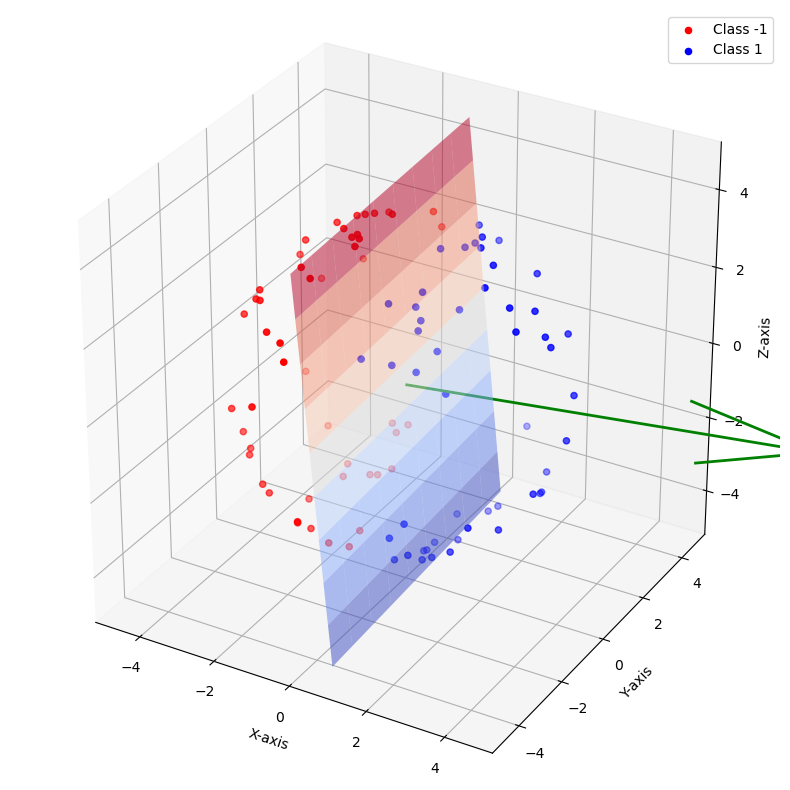

In [18]:
%matplotlib inline

# you can try using one of these instead to allow you to rotate the plot
# %matplotlib widget
# %matplotlib notebook
# %matplotlib ipympl

w_hist, neuron = Update_3D_Perceptron()

# prints the number of steps needed to find the fully linear separable hypeprplane
print(len(w_hist))

fig = plot_perceptron_3d(neuron, class_zero, class_one, data)

The Following plots the updates through time so you can see how the hyperplane changes as it tries to classify all the points.

In [ ]:
# 1 means no framed skipped, 2 means 1 frame skipped, etc.
frame_step_size = 5

fig = plt.figure(figsize=(10, 10))

def animate(i):
    plt.cla()

    # get recorded weights
    temp_neuron = Perceptron(w_hist[i])
    plot_perceptron_3d(temp_neuron, class_zero, class_one, data, passed_fig=fig, show=False)

anim = animation.FuncAnimation(plt.gcf(), animate, frames=range(0, len(w_hist), frame_step_size), interval=50)
display(HTML(anim.to_jshtml()))

# uncomment if you want to save
# anim.save('3DLinearReg.gif', writer='pillow', fps=30)

plt.close()